In [ ]:
import numpy as np
import matplotlib.pyplot as plt
epoch=1200
np.random.seed(32432234)
x = np.random.random((10000,1))*100-50
y = x**2



In [ ]:
print("x:\n", x)


x:
 [[-34.01382254]
 [ -6.24970903]
 [ 46.70130639]
 ...
 [ 13.7108934 ]
 [ 31.17050709]
 [-10.19617593]]


In [ ]:
print("y: ", y)

y:  [[1156.94012386]
 [  39.05886301]
 [2181.01201869]
 ...
 [ 187.98859773]
 [ 971.60051212]
 [ 103.96200361]]


In [ ]:
print("x,y:\n", np.concatenate((x,y),axis=1))


x,y:
 [[ -34.01382254 1156.94012386]
 [  -6.24970903   39.05886301]
 [  46.70130639 2181.01201869]
 ...
 [  13.7108934   187.98859773]
 [  31.17050709  971.60051212]
 [ -10.19617593  103.96200361]]


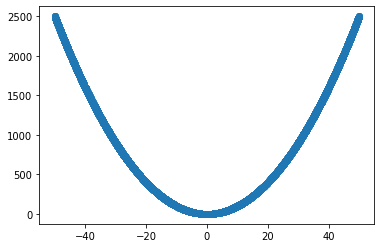

In [ ]:
_ = plt.plot(x, y, 'o')

In [ ]:
split=0.8
split_point=int(x.shape[0]*split) 
X_train=x[:split_point]
X_test=x[split_point:]
Y_train=y[:split_point]
Y_test=y[split_point:]
print(X_train.shape)


(8000, 1)


In [ ]:
from keras.models import *
from keras.layers import *
from keras.regularizers import *
import tensorflow as tf

def baseline_model(X_train, Y_train):
    model = Sequential()
    model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001), input_shape = (1,)))
    model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1))

    model.compile(optimizer='adam',loss='mse')
    return model

def baseline_model_norm(X_train, Y_train):
    model = Sequential()
    model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001), input_shape = (1,)))
    model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer='adam',loss='mse')
    return model
  

    
model = baseline_model(X_train, Y_train)
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


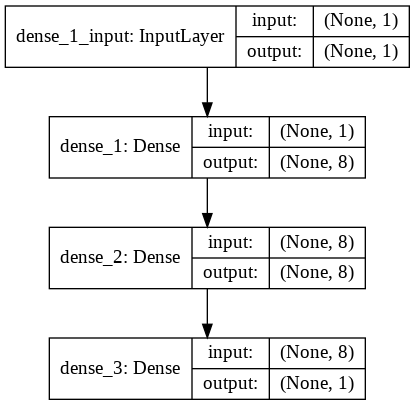

In [ ]:
import keras
import IPython

keras.utils.plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)
IPython.display.Image('test_keras_plot_model.png')

In [ ]:
print(X_train.shape)

(8000, 1)


In [ ]:
print(Y_train.shape)

(8000, 1)


In [ ]:
hist = model.fit(X_train, Y_train,validation_split=0.2,
             epochs= epoch,
             batch_size=256)
print("train end")
#score = model.evaluate(X_test, Y_test, verbose=1)
#print('Test loss score:', score[0])
#print('Test accuracy:', score[1])
#score = model.evaluate(X_train, Y_train, verbose=1)
#print('Train loss score:', score[0])
#print('Train accuracy:', score[1])


Train on 6400 samples, validate on 1600 samples
Epoch 1/1200
6400/6400 [==============================] - 0s 27us/step - loss: 1228281.8250 - val_loss: 1260898.5500
Epoch 2/1200
6400/6400 [==============================] - 0s 7us/step - loss: 1225613.9800 - val_loss: 1258232.7950
Epoch 3/1200
6400/6400 [==============================] - 0s 6us/step - loss: 1223107.0250 - val_loss: 1255738.2000
Epoch 4/1200
6400/6400 [==============================] - 0s 6us/step - loss: 1220722.8800 - val_loss: 1253161.1900
Epoch 5/1200
6400/6400 [==============================] - 0s 7us/step - loss: 1218119.6400 - val_loss: 1250202.1200
Epoch 6/1200
6400/6400 [==============================] - 0s 6us/step - loss: 1215120.8050 - val_loss: 1246969.1300
Epoch 7/1200
6400/6400 [==============================] - 0s 6us/step - loss: 1211843.2325 - val_loss: 1243350.5100
Epoch 8/1200
6400/6400 [==============================] - 0s 8us/step - loss: 1208155.0500 - val_loss: 1239138.7150
Epoch 9/1200
6400/6400 

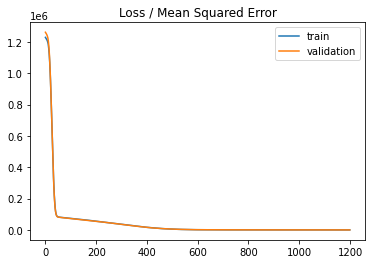

In [ ]:
plt.title('Loss / Mean Squared Error')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [ ]:
i=np.array([[0],[20],])
print(i)
model.predict(i)

[[ 0]
 [20]]


array([[  7.660885],
       [429.71057 ]], dtype=float32)

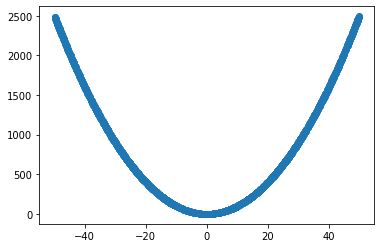

In [ ]:
y_o_test=model.predict(X_test)
_ = plt.plot(X_test, Y_test, 'o')


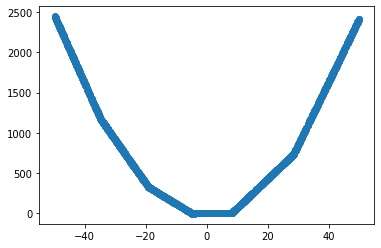

In [ ]:
_ = plt.plot(X_test, y_o_test, 'o')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalerx = MinMaxScaler()
scalery = MinMaxScaler()
#scalerx.fit(x)
scalery.fit(y)
x_norm = x
y_norm = scalery.transform(y)


In [ ]:
xxx=np.array([1,2,3])
print(xxx)
yyy=xxx[:]
yyy[1]=5

print(yyy)
print(xxx)


xl=[1,2,3]
print(xl)
yl=xl
yl[1]=5

print(yl)
print(xl)


xs=5
ys=xs
ys=6
print(xs)
print(ys)


[1 2 3]
[1 5 3]
[1 5 3]
[1, 2, 3]
[1, 5, 3]
[1, 5, 3]
5
6


In [ ]:
print(x_norm)

[[-34.01382254]
 [ -6.24970903]
 [ 46.70130639]
 ...
 [ 13.7108934 ]
 [ 31.17050709]
 [-10.19617593]]


In [ ]:
print(y_norm)

[[0.4628243 ]
 [0.01562501]
 [0.87249591]
 ...
 [0.07520314]
 [0.3886807 ]
 [0.04158898]]


In [ ]:
y

array([[1156.94012386],
       [  39.05886301],
       [2181.01201869],
       ...,
       [ 187.98859773],
       [ 971.60051212],
       [ 103.96200361]])

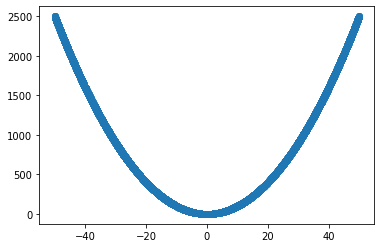

In [ ]:
_ = plt.plot(x, y, 'o')

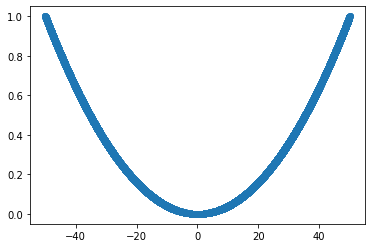

In [ ]:
_ = plt.plot(x_norm, y_norm, 'o')

In [ ]:
X_train_norm=x_norm[:split_point]
X_test_norm=x_norm[split_point:]
Y_train_norm=y_norm[:split_point]
Y_test_norm=y_norm[split_point:]
model_norm = baseline_model_norm(X_train_norm, Y_train_norm)
hist_norm = model_norm.fit(X_train_norm, Y_train_norm,validation_split=0.2,
             epochs= epoch,
             batch_size=256)
print("train end")


Train on 6400 samples, validate on 1600 samples
Epoch 1/1200
6400/6400 [==============================] - 0s 21us/step - loss: 0.2145 - val_loss: 0.2188
Epoch 2/1200
6400/6400 [==============================] - 0s 7us/step - loss: 0.2118 - val_loss: 0.2166
Epoch 3/1200
6400/6400 [==============================] - 0s 6us/step - loss: 0.2099 - val_loss: 0.2147
Epoch 4/1200
6400/6400 [==============================] - 0s 7us/step - loss: 0.2084 - val_loss: 0.2133
Epoch 5/1200
6400/6400 [==============================] - 0s 7us/step - loss: 0.2072 - val_loss: 0.2122
Epoch 6/1200
6400/6400 [==============================] - 0s 7us/step - loss: 0.2061 - val_loss: 0.2112
Epoch 7/1200
6400/6400 [==============================] - 0s 9us/step - loss: 0.2052 - val_loss: 0.2104
Epoch 8/1200
6400/6400 [==============================] - 0s 8us/step - loss: 0.2045 - val_loss: 0.2096
Epoch 9/1200
6400/6400 [==============================] - 0s 8us/step - loss: 0.2037 - val_loss: 0.2089
Epoch 10/1200
6

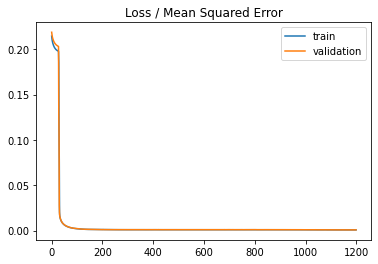

In [ ]:
plt.title('Loss / Mean Squared Error')
plt.plot(hist_norm.history['loss'], label='train')
plt.plot(hist_norm.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [ ]:
input=np.array(x)
print(input)

[[  0]
 [ 20]
 [ 50]
 [100]
 [500]]


In [ ]:
output=model_norm.predict(x)
print(output)

[[0.01637955]
 [0.14236112]
 [0.8818712 ]
 [0.94867504]
 [0.9955804 ]]


In [ ]:
scalery.inverse_transform(output)


array([[  40.945023],
       [ 355.86597 ],
       [2204.4478  ],
       [2371.44    ],
       [2488.691   ]], dtype=float32)

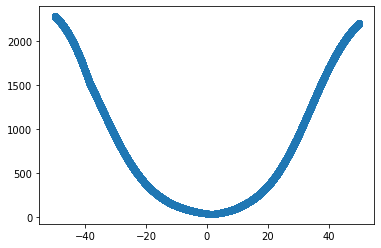

In [ ]:
y_o_norm=scalery.inverse_transform(model_norm.predict(x_norm))
_ = plt.plot(x_norm, y_o_norm, 'o')